In [56]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as sgt
 import statsmodels.graphics.tsaplots as sgt
 from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats.distributions import chi2
from scipy.stats import chi2
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
sns.set()

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b') 
df_comp = df_comp.ffill()  


In [4]:
df_comp['market_value']=df_comp.ftse

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]


In [6]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf  # Log-vraisemblance du premier modèle
    L2 = mod_2.llf  # Log-vraisemblance du deuxième modèle
    LR = 2 * (L2 - L1)  # Statistique de test
    p = chi2.sf(LR, DF).round(3)  # p-value
    return p


In [7]:
df.loc[:, 'returns'] = df['market_value'].pct_change(1) * 100

C:\Users\user\AppData\Local\Temp\ipykernel_13452\2034854889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'returns'] = df['market_value'].pct_change(1) * 100


In [8]:
model_ar_1_1_ma_1 = sm.tsa.ARIMA(df['market_value'], order=(1,1,1))
results_ar_1_1_ma_1 = model_ar_1_1_ma_1.fit()
results_ar_1_1_ma_1.summary()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Wed, 11 Dec 2024   AIC                          55214.010
Time:                        22:21:19   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.866
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7459      0.059     12.652      0.000       0.630       0.861
ma.L1         -0.7919      0.053    -14.923      0.000      -0.896      -0.688
sigma2      3498.8181     40.934     85.475      0.000    3418.589    3579.047
===================================================================================
Ljung-Box (L1) (Q):                   2.63   Jarque-Bera (JB):              3326.21
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\user\AppData\Local\Temp\ipykernel_13452\3224827540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_1_1_ma_1'] = results_ar_1_1_ma_1.resid


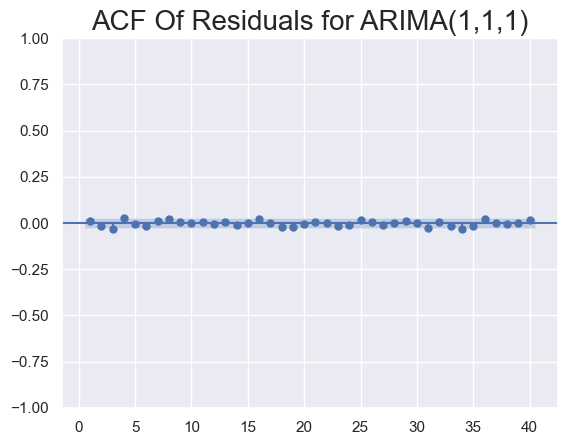

In [9]:
df['res_ar_1_1_1_ma_1'] = results_ar_1_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_1_1_ma_1, zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)", size=20)
plt.show()

In [11]:
model = ARIMA(df['returns'], order=(1, 0, 1))  # (p, d, q) pour ARMA, utilisez d=0
results = model.fit()
results.summary()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7916.500
Date:                Wed, 11 Dec 2024   AIC                          15841.000
Time:                        22:22:58   BIC                          15867.085
Sample:                    01-07-1994   HQIC                         15850.140
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1          0.7650      0.045     16.995      0.000       0.677       0.853
ma.L1         -0.8142      0.040    -20.187      0.000      -0.893      -0.735
sigma2         1.3718      0.014     98.110      0.000       1.344       1.399
===================================================================================
Ljung-Box (L1) (Q):                   2.06   Jarque-Bera (JB):              7494.88
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
model_ret_ar_1 = ARIMA(df['returns'], order=(1, 0, 0))  # AR(1)
results_ar_1 = model_ret_ar_1.fit()

model_ret_ma_1 = ARIMA(df['returns'], order=(0, 0, 1))  # MA(1)
results_ma_1 = model_ret_ma_1.fit()

model_ret_ar_1_ma_1 = ARIMA(df['returns'], order=(1, 0, 1))  # ARMA(1,1)
results_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [16]:
p_value_ar_vs_arma = LLR_test(results_ar_1, results_ar_1_ma_1)
p_value_ma_vs_arma = LLR_test(results_ma_1, results_ar_1_ma_1)

print("LLR Test AR(1) vs ARMA(1,1): p-value =", p_value_ar_vs_arma)
print("LLR Test MA(1) vs ARMA(1,1): p-value =", p_value_ma_vs_arma)

LLR Test AR(1) vs ARMA(1,1): p-value = 0.0
LLR Test MA(1) vs ARMA(1,1): p-value = 0.0


In [23]:
model_ret_ar_3 = ARIMA(df['returns'], order=(3, 0, 0))  
results_ret_ar_3 = model_ret_ar_3.fit()
model_ret_ma_3 = ARIMA(df['returns'], order=(0, 0, 3))  
results_ret_ma_3 = model_ret_ma_3.fit()
model_ret_ar_3_ma_3 = ARIMA(df['returns'], order=(3, 0, 3)) 
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

In [26]:

p_value = LLR_test(results_ret_ar_1_ma_1, results_ret_ar_3_ma_3, DF=4)

print(f"P-value: {p_value}")


P-value: 0.0


In [27]:
print(results_ret_ar_3_ma_3.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7893.515
Date:                Wed, 11 Dec 2024   AIC                          15803.030
Time:                        22:45:07   BIC                          15855.201
Sample:                    01-07-1994   HQIC                         15821.311
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.281      0.200      -0.010       0.048
ar.L1         -0.1880      0.068     -2.780      0.005      -0.321      -0.055
ar.L2         -0.2926      0.054     -5.380      0.0

In [32]:
model_ret_ar_2_ma_2 = ARIMA(df['returns'], order=(2, 0, 2))  
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
print(results_ret_ar_2_ma_2.summary())


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -7914.692
Date:                Wed, 11 Dec 2024   AIC                          15841.384
Time:                        22:53:51   BIC                          15880.512
Sample:                    01-07-1994   HQIC                         15855.095
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1         -0.0969      0.091     -1.068      0.286      -0.275       0.081
ar.L2          0.6975      0.066     10.509      0.0

In [33]:
model_ret_ar_2_ma_3 = ARIMA(df['returns'][1:], order=(2, 0, 3))  # ARIMA avec l'ordre (2, 0, 3)
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
print(results_ret_ar_2_ma_3.summary())


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -7895.587
Date:                Wed, 11 Dec 2024   AIC                          15805.175
Time:                        22:57:53   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.015      1.224      0.221      -0.011       0.049
ar.L1         -0.5600      0.057     -9.777      0.000      -0.672      -0.448
ar.L2         -0.4178      0.065     -6.381      0.0

In [34]:

p_value = LLR_test(results_ret_ar_2_ma_3, results_ret_ar_3_ma_3, DF=4)

print(f"P-value: {p_value}")

P-value: 0.387


In [35]:
model_ret_ar_3_dif_1 = ARIMA(df['returns'][1:], order=(3, 1, 0))  # ARIMA avec l'ordre (3, 1, 0)
results_ret_ar_3_dif_1 = model_ret_ar_3_dif_1.fit()
print(results_ret_ar_3_dif_1.summary())


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -8503.446
Date:                Wed, 11 Dec 2024   AIC                          17014.892
Time:                        22:59:25   BIC                          17040.976
Sample:                    01-10-1994   HQIC                         17024.032
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7401      0.008    -92.491      0.000      -0.756      -0.724
ar.L2         -0.5202      0.009    -55.818      0.000      -0.539      -0.502
ar.L3         -0.3308      0.008    -39.817      0.0

In [38]:
model_ret_ar_3_ma_1 = ARIMA(df['returns'], order=(3, 0, 1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()


In [39]:
model_ret_ar_3_ma_2 = ARIMA(df['returns'], order=(3, 0, 2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()


In [40]:
LLR_test(results_ret_ar_3_ma_1, results_ret_ar_3_ma_2)

0.01

In [42]:
model_ret_ar_2_ma_2 = ARIMA(df['returns'], order=(2, 0, 2))  
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -7914.692
Date:                Wed, 11 Dec 2024   AIC                          15841.384
Time:                        23:05:16   BIC                          15880.512
Sample:                    01-07-1994   HQIC                         15855.095
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1         -0.0969      0.091     -1.068      0.286      -0.275       0.081
ar.L2          0.6975      0.066     10.509      0.000       0.567       0.828
ma.L1          0.0399      0.092      0.435      0.663      -0.140       0.220
ma.L2         -0.7259      0.071    -10.274      0.000      -0.864      -0.587
sigma2         1.3708      0.014     95.248      0.000       1.343       1.399
===================================================================================
Ljung-Box (L1) (Q):                   4.33   Jarque-Bera (JB):              7242.98
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
model_ret_ar_1_ma_3 = ARIMA(df['returns'], order=(1, 0, 3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()

In [47]:
print("ARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)
print("ARMA(1,3): \tLL = ", results_ret_ar_1_ma_3.llf, "\tAIC = ", results_ret_ar_1_ma_3.aic)

ARMA(3,2): 	LL =  -7895.747490026808 	AIC =  15805.494980053616
ARMA(1,3): 	LL =  -7896.837909205795 	AIC =  15805.67581841159


In [52]:
df.iloc[1:, df.columns.get_loc('res_ret_ar_3_ma_2')] = results_ret_ar_3_ma_2.resid[1:]

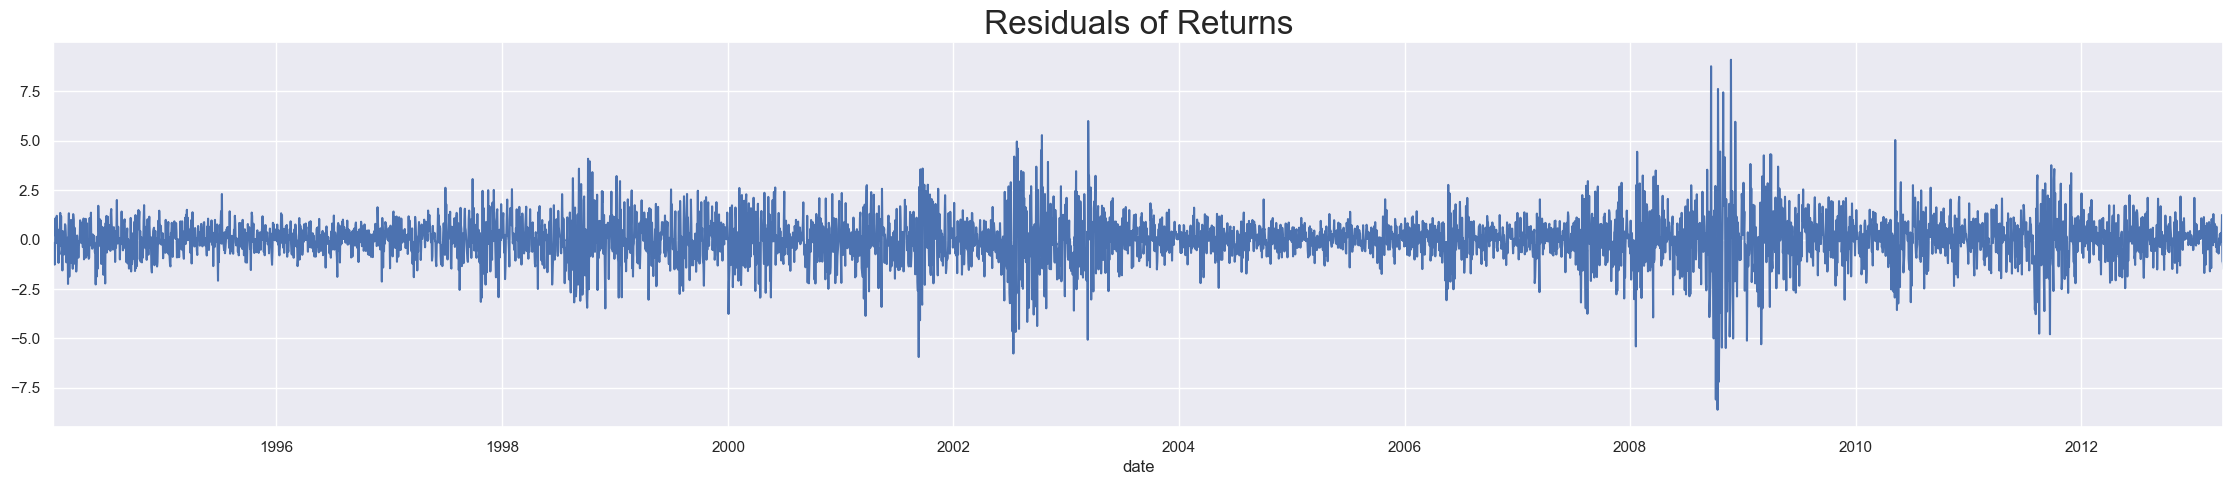

In [53]:
df.res_ret_ar_3_ma_2.plot(figsize=(28,5))
plt.title("Residuals of Returns", size=24)
plt.show()

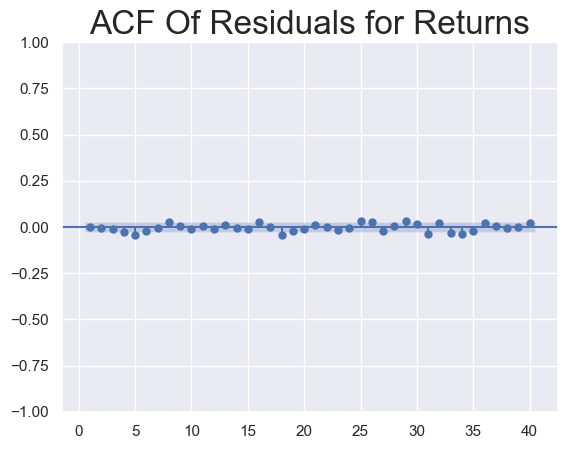

In [58]:
sgt.plot_acf(df['res_ret_ar_3_ma_2'][2:], zero=False, lags=40)
plt.title("ACF Of Residuals for Returns", size=24)
plt.show()

In [59]:
model_ret_ar_5_ma_5 = ARIMA(df['returns'], order=(5, 0, 5))  
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -7883.171
Date:                Wed, 11 Dec 2024   AIC                          15790.342
Time:                        23:18:27   BIC                          15868.599
Sample:                    01-07-1994   HQIC                         15817.764
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0169      0.014      1.176      0.240      -0.011       0.045
ar.L1         -0.0701      0.124     -0.564      0.572      -0.314       0.173
ar.L2         -0.5310      0.080     -6.627      0.000      -0.688      -0.374
ar.L3         -0.0726      0.073     -1.000      0.317      -0.215       0.070
ar.L4          0.2485      0.070      3.541      0.000       0.111       0.386
ar.L5          0.1369      0.089      1.545      0.122      -0.037       0.310
ma.L1          0.0434      0.124      0.350      0.726      -0.199       0.286
ma.L2          0.4764      0.080      5.928      0.000       0.319       0.634
ma.L3         -0.0287      0.070     -0.411      0.681      -0.166       0.108
ma.L4         -0.2374      0.069     -3.462      0.001      -0.372      -0.103
ma.L5         -0.2283      0.085     -2.699      0.007      -0.394      -0.063
sigma2         1.3542      0.015     89.956      0.000       1.325       1.384
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              6416.80
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
model_ret_ar_5_ma_1 = ARIMA(df['returns'], order=(5, 0, 1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -7889.311
Date:                Wed, 11 Dec 2024   AIC                          15794.623
Time:                        23:20:49   BIC                          15846.794
Sample:                    01-07-1994   HQIC                         15812.904
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.301      0.193      -0.010       0.047
ar.L1          0.3449      0.105      3.270      0.001       0.138       0.552
ar.L2         -0.0458      0.009     -4.852      0.000      -0.064      -0.027
ar.L3         -0.0651      0.010     -6.435      0.000      -0.085      -0.045
ar.L4          0.0742      0.012      6.092      0.000       0.050       0.098
ar.L5         -0.0813      0.009     -9.480      0.000      -0.098      -0.064
ma.L1         -0.3682      0.106     -3.461      0.001      -0.577      -0.160
sigma2         1.3570      0.015     92.269      0.000       1.328       1.386
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6474.21
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
model_ret_ar_1_ma_5 = ARIMA(df['returns'], order=(1, 0, 5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
results_ret_ar_1_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -7890.974
Date:                Wed, 11 Dec 2024   AIC                          15797.949
Time:                        23:21:33   BIC                          15850.120
Sample:                    01-07-1994   HQIC                         15816.230
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.297      0.194      -0.010       0.047
ar.L1          0.3218      0.133      2.415      0.016       0.061       0.583
ma.L1         -0.3467      0.134     -2.593      0.010      -0.609      -0.085
ma.L2         -0.0406      0.010     -4.157      0.000      -0.060      -0.021
ma.L3         -0.0682      0.011     -6.099      0.000      -0.090      -0.046
ma.L4          0.0736      0.015      5.012      0.000       0.045       0.102
ma.L5         -0.0682      0.009     -7.411      0.000      -0.086      -0.050
sigma2         1.3579      0.015     91.599      0.000       1.329       1.387
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6470.96
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
print("ARMA(5,1): \tLL = ", results_ret_ar_5_ma_1.llf, "\tAIC = ", results_ret_ar_5_ma_1.aic)
print("ARMA(1,5): \tLL = ", results_ret_ar_1_ma_5.llf, "\tAIC = ", results_ret_ar_1_ma_5.aic)

ARMA(5,1): 	LL =  -7889.311305453491 	AIC =  15794.622610906981
ARMA(1,5): 	LL =  -7890.974434537848 	AIC =  15797.948869075695


In [63]:
print("ARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)

ARMA(3,2): 	LL =  -7895.747490026808 	AIC =  15805.494980053616


In [70]:
model_ret_ar_5_ma_1 = ARIMA(df['returns'], order=(5, 0, 1))  
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

C:\Users\user\AppData\Local\Temp\ipykernel_13452\3425849216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid


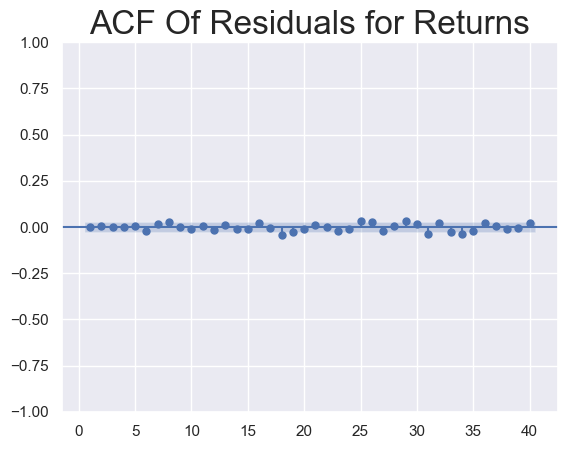

In [72]:
sgt.plot_acf(df['res_ret_ar_5_ma_1'][1:], zero=False, lags=40)
plt.title("ACF Of Residuals for Returns", size=24)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13452\763197077.py:1: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  sgt.plot_acf(df.market_value, unbiased=True, zero=False, lags=40)


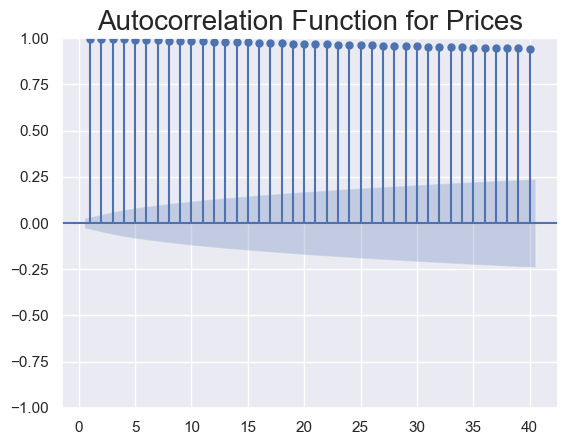

In [73]:
sgt.plot_acf(df.market_value, unbiased=True, zero=False, lags=40)
plt.title("Autocorrelation Function for Prices", size=20)
plt.show()

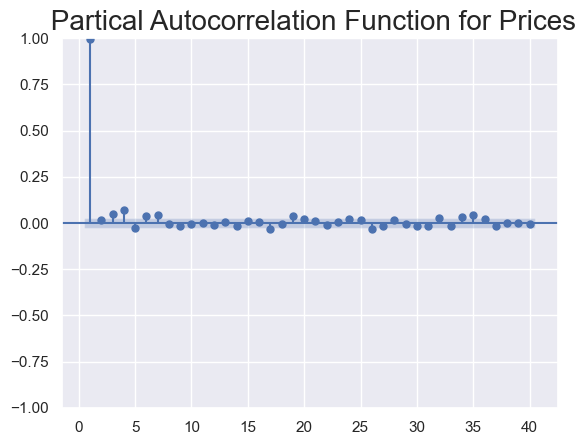

In [74]:
sgt.plot_pacf(df.market_value, lags=40, alpha=0.05, zero=False, method='ols')
plt.title(" Partical Autocorrelation Function for Prices", size=20)
plt.show()

In [75]:
model_ret_ar_1_ma_1 = ARIMA(df['returns'], order=(1, 0, 1))  
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7916.500
Date:                Wed, 11 Dec 2024   AIC                          15841.000
Time:                        23:35:10   BIC                          15867.085
Sample:                    01-07-1994   HQIC                         15850.140
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1          0.7650      0.045     16.995      0.000       0.677       0.853
ma.L1         -0.8142      0.040    -20.187      0.000      -0.893      -0.735
sigma2         1.3718      0.014     98.110      0.000       1.344       1.399
===================================================================================
Ljung-Box (L1) (Q):                   2.06   Jarque-Bera (JB):              7494.88
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
df['res_ar_1_ma_1'] = results_ret_ar_1_ma_1.resid


C:\Users\user\AppData\Local\Temp\ipykernel_13452\505247222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_ma_1'] = results_ret_ar_1_ma_1.resid


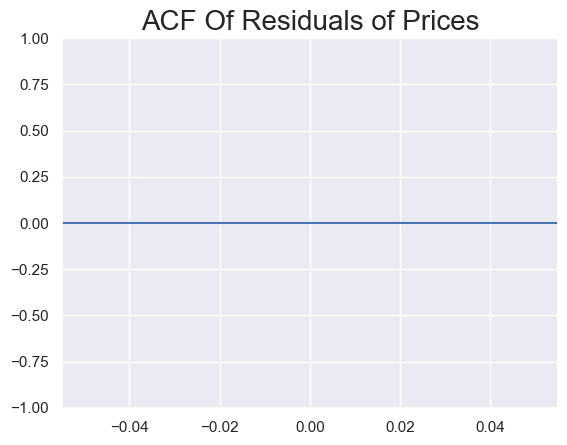

In [79]:
sgt.plot_acf(df['res_ar_1_ma_1'], zero=False, lags=40)
plt.title("ACF Of Residuals of Prices", size=20)
plt.show()

In [82]:
model_ar_6_ma_6 = sm.tsa.ARIMA(df['market_value'], order=(6, 0, 6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit()
print(results_ar_6_ma_6.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 6)   Log Likelihood              -27591.277
Date:                Wed, 11 Dec 2024   AIC                          55210.553
Time:                        23:42:39   BIC                          55301.853
Sample:                    01-07-1994   HQIC                         55242.546
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6408    511.819      9.944      0.000    4086.495    6092.787
ar.L1          0.7381      0.925      0.798      0.425      -1.075       2.551
ar.L2          0.2446      1.553      0.158      0.8

In [83]:
model_ar_5_ma_6 = sm.tsa.ARIMA(df['market_value'], order=(5, 0, 6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit()
print(results_ar_5_ma_6.summary())


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 6)   Log Likelihood              -27589.831
Date:                Wed, 11 Dec 2024   AIC                          55205.661
Time:                        23:43:08   BIC                          55290.439
Sample:                    01-07-1994   HQIC                         55235.368
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6407   1822.557      2.793      0.005    1517.494    8661.788
ar.L1          0.5980      0.723      0.827      0.408      -0.819       2.015
ar.L2         -0.2424      0.814     -0.298      0.7

In [84]:
model_ar_6_ma_1 = sm.tsa.ARIMA(df['market_value'], order=(6, 0, 1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit()
print(results_ar_6_ma_1.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 1)   Log Likelihood              -27594.195
Date:                Wed, 11 Dec 2024   AIC                          55206.390
Time:                        23:44:24   BIC                          55265.082
Sample:                    01-07-1994   HQIC                         55226.956
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6310    525.528      9.685      0.000    4059.615    6119.647
ar.L1          1.3884      0.158      8.793      0.000       1.079       1.698
ar.L2         -0.4332      0.154     -2.812      0.0

In [87]:
model_ret_ar_5_ma_6 = sm.tsa.ARIMA(df['market_value'], order=(5, 0, 6))
results_ret_ar_5_ma_6 = model_ret_ar_5_ma_6.fit()
model_ret_ar_6_ma_1 = sm.tsa.ARIMA(df['market_value'], order=(6, 0, 1))
results_ret_ar_6_ma_1 = model_ret_ar_6_ma_1.fit()
print("ARMA(5,6): \tLL = ", results_ret_ar_5_ma_6.llf, "\tAIC = ", results_ret_ar_5_ma_6.aic)
print("ARMA(6,1): \tLL = ", results_ret_ar_6_ma_1.llf, "\tAIC = ", results_ret_ar_6_ma_1.aic)


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(5,6): 	LL =  -27589.83060905918 	AIC =  55205.66121811836
ARMA(6,1): 	LL =  -27594.19488746544 	AIC =  55206.38977493088


C:\Users\user\AppData\Local\Temp\ipykernel_13452\3323954345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_5_ma_6'] = results_ret_ar_5_ma_6.resid


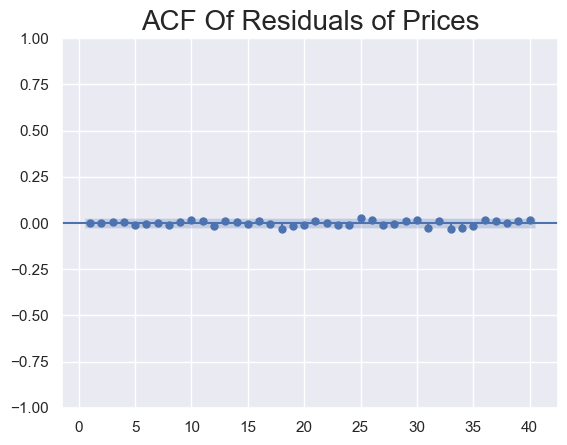

In [89]:
df['res_ar_5_ma_6'] = results_ret_ar_5_ma_6.resid
sgt.plot_acf(df['res_ar_5_ma_6'], zero=False, lags=40)
plt.title("ACF Of Residuals of Prices", size=20)
plt.show()